# UK Property Image Classification EDA

---

#### Problem statement:
Building a convoluated neural network to classify period and modern residential buildings in UK

#### Data:
Images of residential buildings from public domains. Around 1000 images for each class 

### Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from skimage import io
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

In [14]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [15]:
# For reproducibility
np.random.seed(42)

#### Load the training data downloaded from Kaggle

In [16]:
# defining global variable path
image_path = "../images/old_samples/"

'''function to load folder into arrays and  then it returns that same array'''

def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = os.listdir(path)
    return image_files

In [17]:
image_files = loadImages(image_path)
image_files

['photo-14610337-AfvlL7.jpg',
 'photo-14613473-oJlAGk.jpg',
 'photo-14613600-uzDqQq.jpg',
 'photo-14614603-V4bv1O.jpg',
 'photo-14615502-8O2X6l.jpg',
 'photo-14616168-5TpyI2.jpg',
 'photo-14617955-V4dZxr.jpg',
 'photo-14618127-QvlsAy.jpg',
 'photo-14622750-kpCpOD.jpg',
 'photo-14629155-jC4lQF.jpg',
 'photo-14629754-mieGul.jpg',
 'photo-14631125-qRUOL8.jpg',
 'photo-14631228-PT9Z5G.jpg',
 'photo-14631240-0QQy9B.jpg',
 'photo-14635306-6MWiMM.jpg',
 'photo-14636134-HpAQqe.jpg',
 'photo-14636363-THlSWl.jpg',
 'photo-14636735-T2LZZp.jpg',
 'photo-14639139-0umZNo.jpg',
 'photo-14639144-IXsx4D.jpg',
 'photo-14639165-TfgDth.jpg',
 'photo-14639168-HJlNUm.jpg',
 'photo-14639242-VynKBb.jpg',
 'photo-14639253-nGmV7X.jpg',
 'photo-14639263-wDh0qy.jpg',
 'photo-14639376-XBOGt8.jpg',
 'photo-14641460-fgM0tC.jpg',
 'photo-14641582-5DQQrQ.jpg',
 'photo-14642046-49Loug.jpg',
 'photo-14643904-FQGfj2.jpg',
 'photo-14648427-tIjkOC.jpg',
 'photo-14648616-7gKhKW.jpg',
 'photo-14648837-VQIw0s.jpg',
 'photo-14

In [18]:
img = io.imread(image_path + image_files[0])
img.shape

(430, 645, 3)

In [19]:
# get image resolution
X = []
sizes = {}
i = 0

for file in image_files:
    img = io.imread(image_path + file)
    X.append(img)
    sizes[i] = {"row": img.shape[0], "col": img.shape[1]}
    print(img.shape)
    i += 1

print(sizes)

(430, 645, 3)
(437, 656, 3)
(437, 655, 3)
(437, 656, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 583, 3)
(437, 655, 3)
(437, 583, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 656, 3)
(437, 655, 3)
(437, 656, 3)
(437, 655, 3)
(437, 654, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(438, 659, 3)
(437, 656, 3)
(437, 655, 3)
(437, 656, 3)
(437, 656, 3)
(437, 655, 3)
(437, 655, 3)
(436, 656, 3)
(437, 656, 3)
(430, 645, 3)
(437, 654, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(434, 656, 3)
(437, 656, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 583, 3)
(437, 655, 3)
(437, 654, 3)
(437, 655, 3)
(437, 656, 3)
(437, 656, 3)
(437, 655, 3)
(437, 655, 3)
(437, 654, 3)
(437, 656, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 656, 3)
(437, 656, 3)
(437, 656, 3)
(430, 645, 3)
(437, 655, 3)
(431, 656, 3)
(437, 583, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 655, 3)
(437, 654, 3)
(437, 656, 3)
(437, 

c:\python37\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [20]:
df_sizes = pd.DataFrame.from_dict(sizes, orient="index")
df_sizes.head()

,row,col
0,430,645
1,437,656
2,437,655
3,437,656
4,437,655


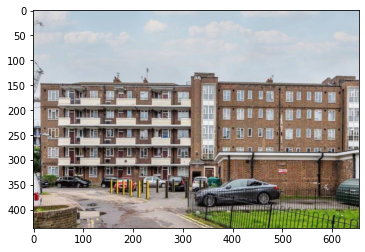

In [21]:
plt.imshow(img)

In [12]:
# getting the lowest value of row/column
min_row = min(df_sizes["row"])
min_row

393

In [64]:
min_col = min(df_sizes["col"])
min_col

645

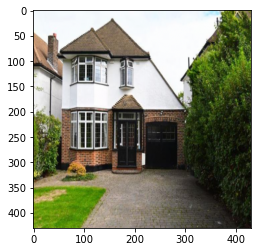

In [65]:
# resize to square
# next steps: consider cropping images, removing noise etc

min_size = min(min_row, min_col)
img_resized = resize(img, (min_size,min_size), anti_aliasing=True)
plt.imshow(img_resized)

### First trial of model

In [69]:
# Instantiate a CNN.
cnn_model = Sequential()

In [70]:
# Add a convolutional layer.

cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(min_size,min_size,3))) # shape of input (image)

In [ ]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
cnn_model.add(Flatten())

In [ ]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [ ]:
# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=5,
                        verbose=1)